In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')


In [4]:
dataset.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
dataset.shape

(9994, 21)

In [6]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# What is the average sales per product?

In [9]:
average_sales_per_product = dataset.groupby('Product Name')['Sales'].mean().reset_index()
average_sales_per_product.columns = ['Product', 'Average Sales']

In [10]:
average_sales_per_product.head(5)

,Product,Average Sales
0,"""While you Were Out"" Message Book, One Form pe...",8.409333
1,"#10 Gummed Flap White Envelopes, 100/Box",10.325000
2,#10 Self-Seal White Envelopes,27.170500
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",69.843429
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",28.667200


# Which product is the most/least sold?

In [11]:
most_product = dataset.loc[dataset["Sales"].idxmax()]
least_product = dataset.loc[dataset["Sales"].idxmin()]
print("Most Product")
print(most_product)
print("Least Product")
print(least_product)

Most Product
Row ID                                                        2698
Order ID                                            CA-2011-145317
Order Date                                              18-03-2011
Ship Date                                               23-03-2011
Ship Mode                                           Standard Class
Customer ID                                               SM-20320
Customer Name                                          Sean Miller
Segment                                                Home Office
Country                                              United States
City                                                  Jacksonville
State                                                      Florida
Postal Code                                                  32216
Region                                                       South
Product ID                                         TEC-MA-10002412
Category                                         

# What is the distribution of sales by region?

In [12]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


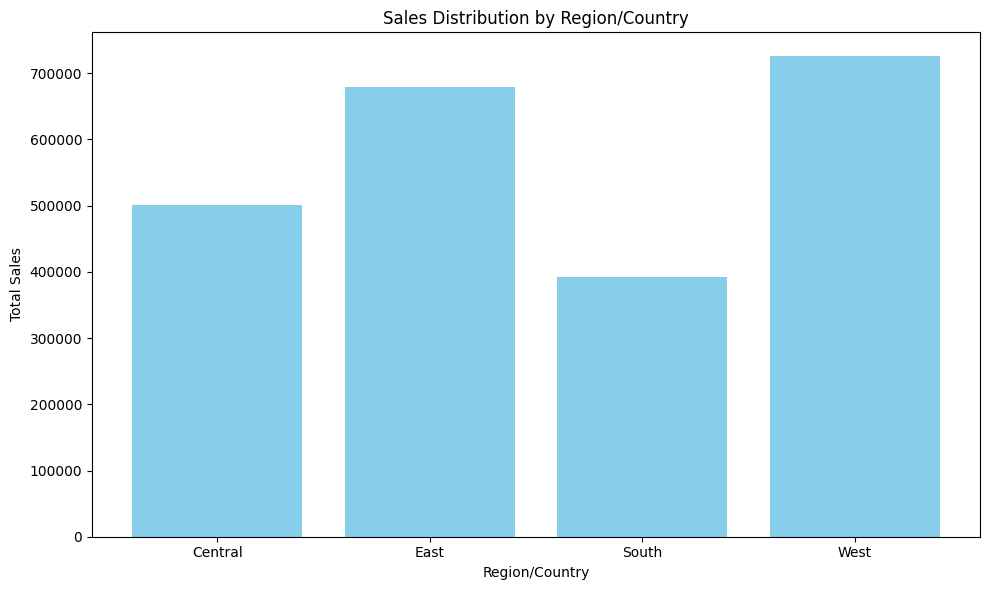

In [13]:
sales_distribution = dataset.groupby('Region')['Sales'].sum().reset_index()

# Plot the sales distribution by region
plt.figure(figsize=(10, 6))
plt.bar(sales_distribution['Region'], sales_distribution['Sales'], color='skyblue')
plt.xlabel('Region/Country')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Region/Country')
plt.tight_layout()
plt.show()

# What are the top 5 best-selling products?

In [14]:
best_selling = dataset.sort_values(by = ["Sales"], ascending = False)
best_selling = best_selling.head(5)

In [15]:
best_selling["Product Name"]

2697    Cisco TelePresence System EX90 Videoconferenci...
6826                Canon imageCLASS 2200 Advanced Copier
8153                Canon imageCLASS 2200 Advanced Copier
2623                Canon imageCLASS 2200 Advanced Copier
4190                Canon imageCLASS 2200 Advanced Copier
Name: Product Name, dtype: object

# What is the total sales for each month or year?

In [16]:
dataset["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
9994 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [17]:
# Convert 'Order Date' from object to datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%d-%m-%Y')

In [18]:
# Group by Year and Month and then sum the 'Sales' column
dataset['Year-Month'] = dataset['Order Date'].dt.to_period('M')
monthly_sales = dataset.groupby('Year-Month')['Sales'].sum().reset_index()

# Group by Year and then sum the 'Sales' column
dataset['Year'] = dataset['Order Date'].dt.year
yearly_sales = dataset.groupby('Year')['Sales'].sum().reset_index()

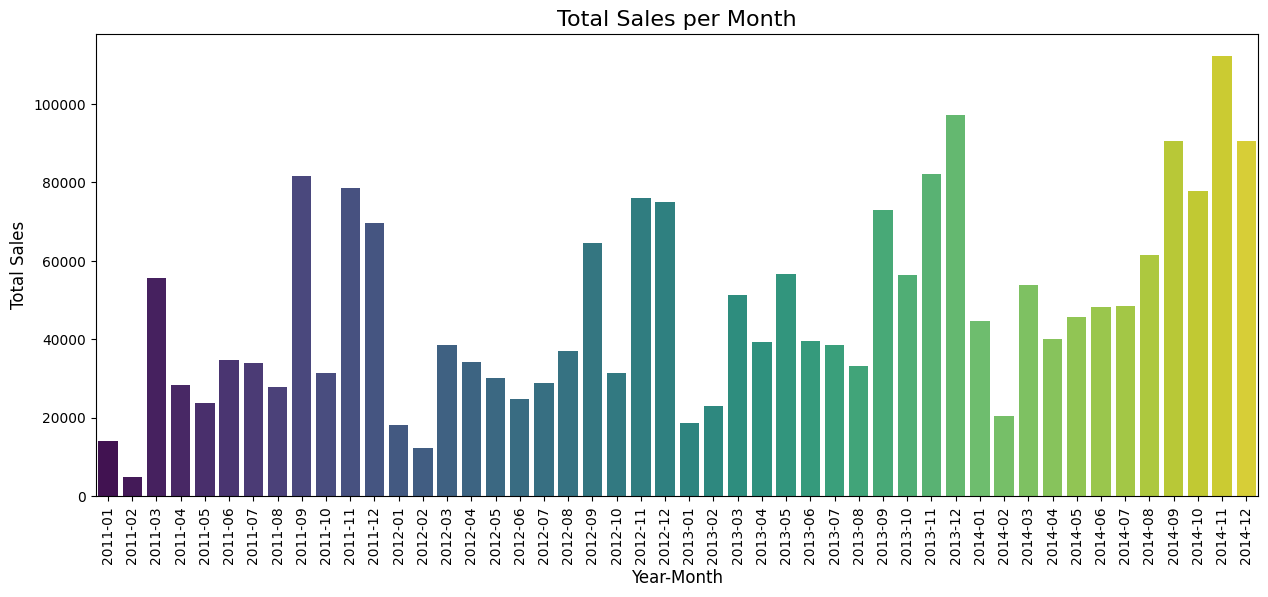

In [19]:
# Plot the sales distribution by monthly
plt.figure(figsize=(15, 6))
sns.barplot(x='Year-Month', y='Sales', data=monthly_sales, hue="Year-Month", palette='viridis')
plt.title('Total Sales per Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.show()

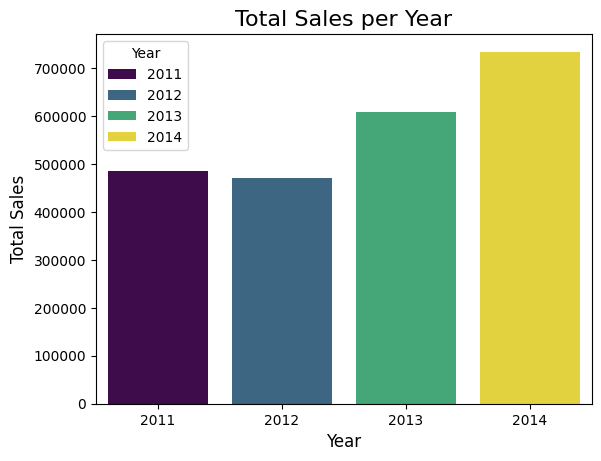

In [20]:
# Plot the sales distribution by yearly
sns.barplot(x='Year', y='Sales', data=yearly_sales, hue='Year', palette='viridis')
plt.title('Total Sales per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

# Is there any correlation between discount percentage and sales?

In [21]:
# Calculate the correlation between 'Discount' and 'Sales'
correlation = dataset['Discount'].corr(dataset['Sales'])
print(f"Correlation between Discount and Sales: {correlation}")

Correlation between Discount and Sales: -0.02819012415753557


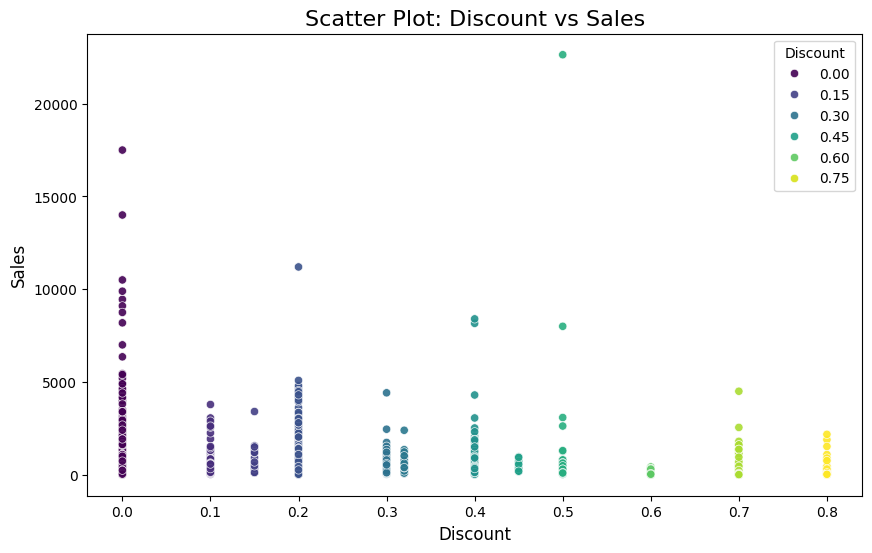

In [22]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=dataset, hue='Discount', palette='viridis', alpha=0.9)


plt.title('Scatter Plot: Discount vs Sales', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


# What are the top-performing sales channels (e.g., online, in-store)?

In [23]:
# Group by 'Ship Mode' (representing sales channels) and sum the 'Sales'
top_sales_channels = dataset.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
top_sales_channels

Ship Mode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64

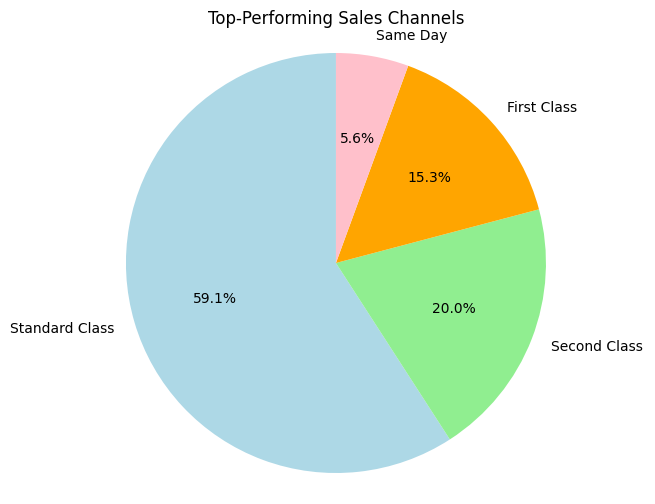

In [24]:
plt.figure(figsize=(8, 6))
plt.pie(top_sales_channels, labels=top_sales_channels.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.title('Top-Performing Sales Channels')
plt.axis('equal')
plt.show()

# How many orders are placed on weekdays vs weekends?

In [25]:
dataset['Day of Week'] = dataset['Order Date'].dt.dayofweek

# Categorize days into weekdays and weekends
dataset['Day Type'] = dataset['Day of Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count orders for weekdays and weekends
orders_by_day_type = dataset['Day Type'].value_counts()

In [26]:
orders_by_day_type

Day Type
Weekday    8835
Weekend    1159
Name: count, dtype: int64

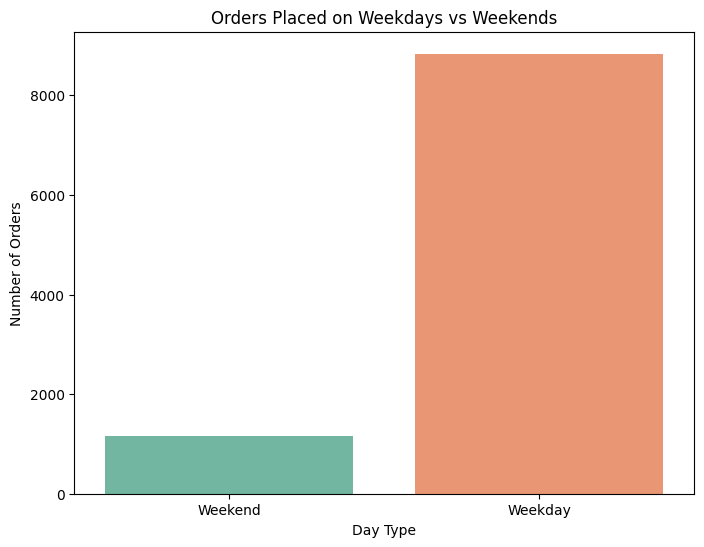

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset, x='Day Type', hue='Day Type', palette='Set2')

plt.title('Orders Placed on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Orders')
plt.show()

# What is the overall trend in sales over time?

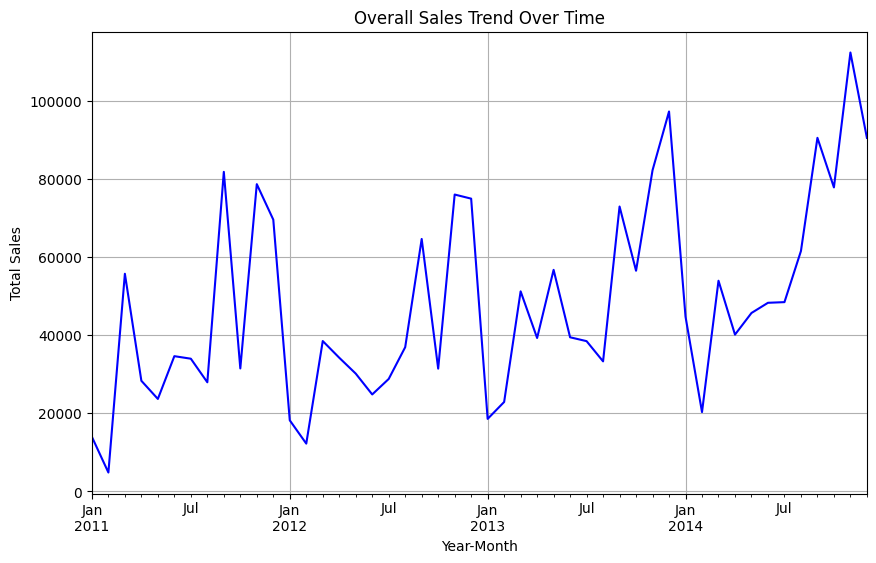

In [28]:
dataset['YearMonth'] = dataset['Order Date'].dt.to_period('M')
sales_trend = dataset.groupby('YearMonth')['Sales'].sum()

# Plot the overall sales trend over time
plt.figure(figsize=(10,6))
sales_trend.plot(kind='line', color='b')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Which product category has the highest/lowest average order value?

In [29]:
# Calculate the average order value for each product category
category_avg_order_value = dataset.groupby('Category')['Sales'].mean().sort_values(ascending=False)

# Display the highest and lowest average order value categories
highest_avg_order_value = category_avg_order_value.idxmax()
lowest_avg_order_value = category_avg_order_value.idxmin()

print("Category with highest average order value:", highest_avg_order_value)
print("Category with lowest average order value:", lowest_avg_order_value)

category_avg_order_value

Category with highest average order value: Technology
Category with lowest average order value: Office Supplies


Category
Technology         452.709276
Furniture          349.834887
Office Supplies    119.324101
Name: Sales, dtype: float64

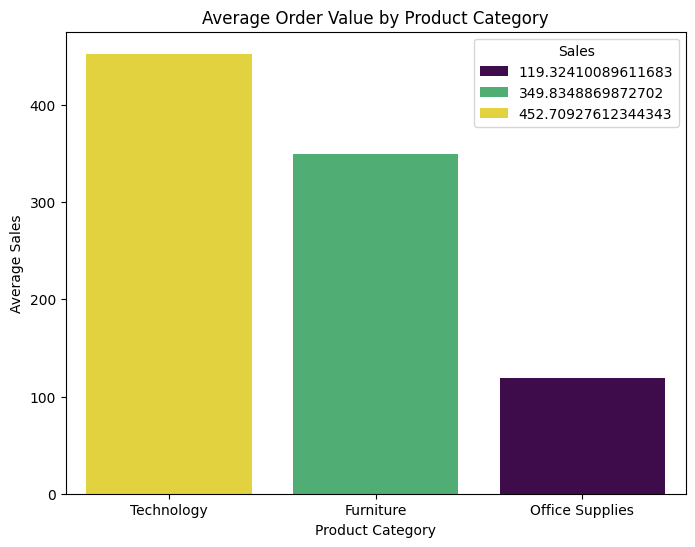

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x=category_avg_order_value.index, y=category_avg_order_value.values, hue=category_avg_order_value, palette="viridis")
plt.title('Average Order Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.show()

# Which region has the highest/lowest sales performance?

In [31]:
# Group the data by region and calculate total sales for each region
region_sales = dataset.groupby('Region')['Sales'].sum().sort_values(ascending=False)

highest_sales_region = region_sales.idxmax()
lowest_sales_region = region_sales.idxmin()

print(f"Highest Sales Region: {highest_sales_region} with total sales of {region_sales.max()}")
print(f"Lowest Sales Region: {lowest_sales_region} with total sales of {region_sales.min()}")


Highest Sales Region: West with total sales of 725457.8245
Lowest Sales Region: South with total sales of 391721.905


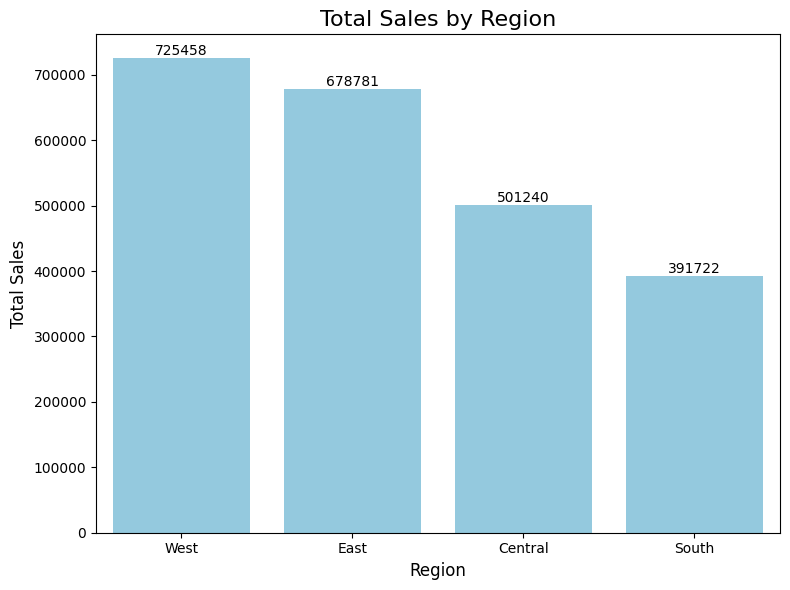

In [32]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(region_sales, color='skyblue')
ax.bar_label(ax.containers[0])
# Add labels and title
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()
plt.show()

# What are the sales trends during different seasons (spring, summer, autumn, winter)?

In [39]:
dataset['month'] = dataset['Order Date'].dt.month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

dataset['Season'] = dataset['month'].apply(get_season)

season_sales = dataset.groupby('Season')['Sales'].sum()

season_sales


Season
Autumn    856005.3754
Spring    497226.8381
Summer    456252.9003
Winter    487715.7465
Name: Sales, dtype: float64

C:\Users\Z\AppData\Local\Temp\ipykernel_10620\1485561495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(season_sales, palette='Set2')


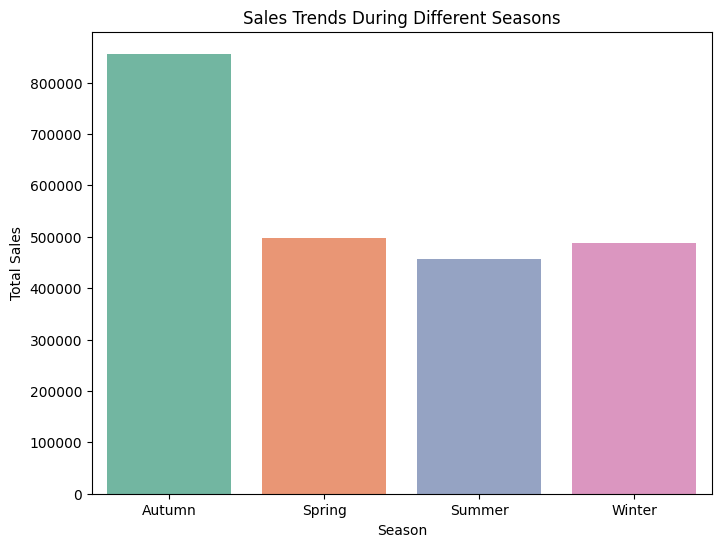

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(season_sales, palette='Set2')

# Adding titles and labels
plt.title('Sales Trends During Different Seasons')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

# How long does it take, on average, to fulfill an order?

In [48]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%d-%m-%Y')
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%d-%m-%Y')

dataset['Fulfillment Time'] = (dataset['Ship Date'] - dataset['Order Date']).dt.days

average_fulfillment_time = dataset['Fulfillment Time'].mean()

print("Average Fulfillment Time: ", average_fulfillment_time, "days")

Average Fulfillment Time:  3.958875325195117 days


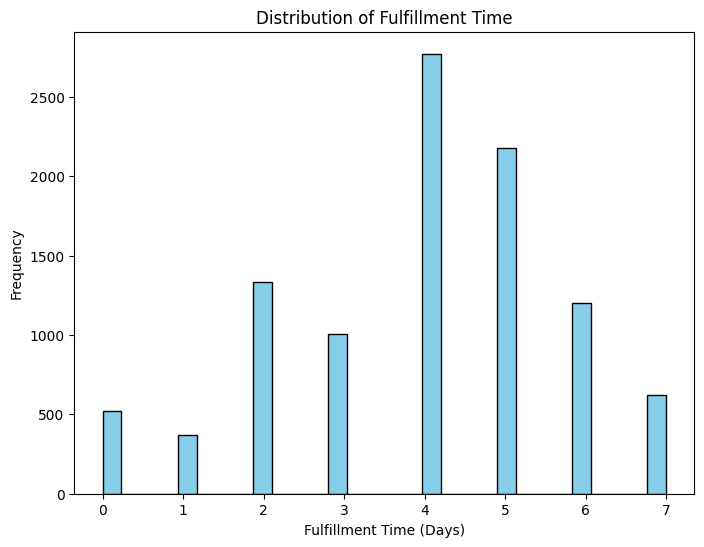

In [51]:
plt.figure(figsize=(8,6))
plt.hist(dataset['Fulfillment Time'].dropna(), bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Fulfillment Time')
plt.xlabel('Fulfillment Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Which customer segments spend the most?

In [54]:
segment_sales = dataset.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

segment_sales

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

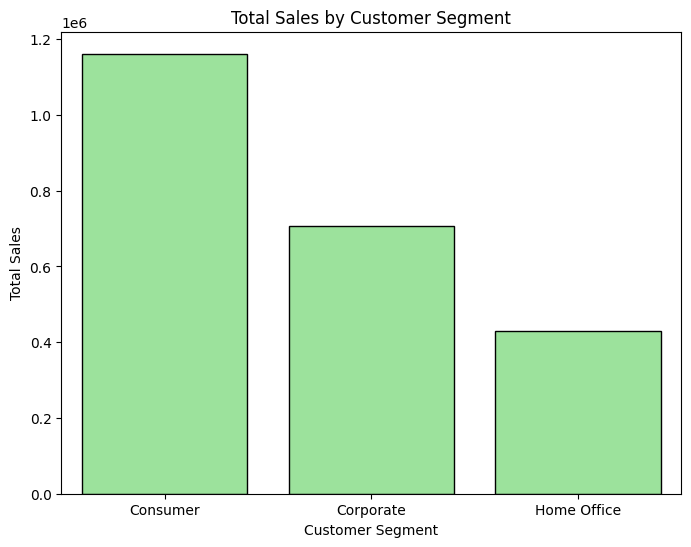

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(segment_sales, color='lightgreen', edgecolor='black')

plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()